In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
import sys
sys.path.append('..')
from madule import plots
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [2]:
# This should be the second module to be run

In [3]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


In [4]:
dataActFirst = loadmat('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/predefined-task-values/ExpStruct_ActFirst_winOnly.mat')  
dataClrFirst = loadmat('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/predefined-task-values/ExpStruct_StimFirst_winOnly.mat')  


In [35]:
#repetition effect over action learning
data_session1_Act1   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Act')&(behAll['session']==1)&(behAll['run']==2)&(behAll['block']=='Act')]
data_session1_Act2   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Stim')&(behAll['session']==1)&(behAll['run']==1)&(behAll['block']=='Act')]

data_session2_Act1   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Act')&(behAll['session']==2)&(behAll['run']==2)&(behAll['block']=='Act')]
data_session2_Act2   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Stim')&(behAll['session']==2)&(behAll['run']==1)&(behAll['block']=='Act')]

#repetition effect over color learning
data_session1_Stim1   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Act')&(behAll['session']==1)&(behAll['run']==1)&(behAll['block']=='Stim')]
data_session1_Stim2   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Stim')&(behAll['session']==1)&(behAll['run']==1)&(behAll['block']=='Stim')]

data_session2_Stim1   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Act')&(behAll['session']==2)&(behAll['run']==1)&(behAll['block']=='Stim')]
data_session2_Stim2   = behAll.loc[(behAll['sub_ID']=='sub-012')&(behAll['stimActFirst']=='Stim')&(behAll['session']==2)&(behAll['run']==1)&(behAll['block']=='Stim')]

In [36]:
# Define trilNumber as x and pushed chosen as y of session 1 over action leaning model
x1 = np.concatenate([data_session1_Act1['trialNumber'].to_numpy()-43, 
                    data_session1_Act2['trialNumber'].to_numpy()-43]).reshape(-1,1)
y1 = np.concatenate([data_session1_Act1['pushed'].to_numpy(), 
                     -(data_session1_Act2['pushed'].to_numpy()-1)])

# Define trilNumber as x and pushed chosen as y of session 2 over action leaning model
x2 = np.concatenate([data_session2_Act1['trialNumber'].to_numpy()-43, 
                    data_session2_Act2['trialNumber'].to_numpy()-43]).reshape(-1,1)
y2 = np.concatenate([data_session2_Act1['pushed'].to_numpy(), 
                     -(data_session2_Act2['pushed'].to_numpy()-1)])

 
# Define trilNumber as x and pushed chosen as y of session 1 over color leaning model
x3 = np.concatenate([data_session1_Stim1['trialNumber'].to_numpy()-43, 
                     data_session1_Stim2['trialNumber'].to_numpy()-1]).reshape(-1,1)
y3 = np.concatenate([data_session1_Stim1['yellowChosen'].to_numpy(), 
                     -(data_session1_Stim2['yellowChosen'].to_numpy()-1)])

# Define trilNumber as x and pushed chosen as y of session 2 over color leaning model
x4 = np.concatenate([data_session2_Stim1['trialNumber'].to_numpy()-43, 
                     data_session2_Stim2['trialNumber'].to_numpy()-1]).reshape(-1,1)
y4 = np.concatenate([data_session2_Stim1['yellowChosen'].to_numpy(), 
                     -(data_session2_Stim2['yellowChosen'].to_numpy()-1)])


In [37]:
# model regression for session 1 over action value learning
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x1, y1)
# model regression for session 2 over color value learning
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(x2, y2)

# model regression for session 1 over color value learning
model3 = LogisticRegression(solver='liblinear', random_state=0)
model3.fit(x3, y3)

# model regression for session 2 over color value learning
model4 = LogisticRegression(solver='liblinear', random_state=0)
model4.fit(x4, y4)

LogisticRegression(random_state=0, solver='liblinear')

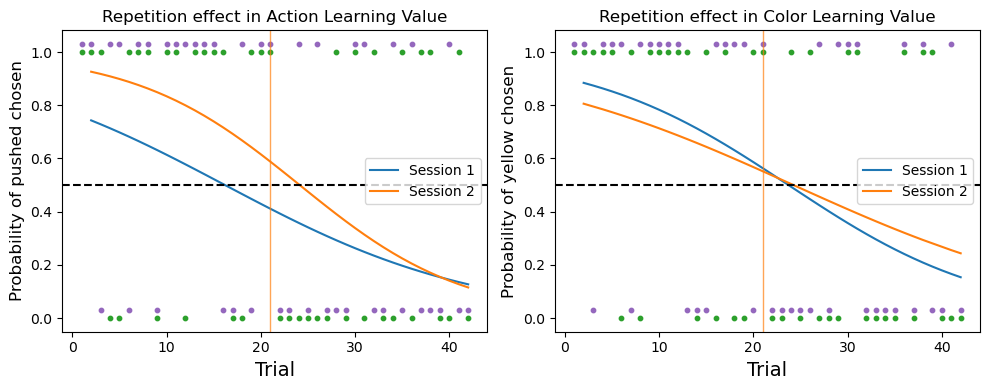

In [38]:
fig = plt.figure(figsize=(10,4), tight_layout=True)
row = 1
column = 2

fig.add_subplot(row, column, 1)
plt.plot(np.unique(x1), model1.predict_proba(np.unique(x1).reshape(-1,1))[:,1])
plt.plot(np.unique(x2), model2.predict_proba(np.unique(x2).reshape(-1,1))[:,1])
plt.axhline(y=.5, color='black' , linestyle='--')
plt.axvline(x = 21, color='#ff7f0e', linewidth=1, alpha=.7)
plt.legend(['Session 1', 'Session 2'])
plt.title('Repetition effect in Action Learning Value')
plt.xlabel('Trial', fontsize='14')
plt.ylabel('Probability of pushed chosen', fontsize='12')
plt.scatter(np.arange(1, 43), dataActFirst['triallist2_2'][0], s=10, c='#2ca02c', marker='o')
plt.scatter(np.arange(1, 43), -(dataClrFirst['triallist1_2'][0]-1) + .03, s=10, c='#9467bd', marker='o')


fig.add_subplot(row, column, 2)
plt.plot(np.unique(x3), model3.predict_proba(np.unique(x3).reshape(-1,1))[:,1])
plt.plot(np.unique(x4), model4.predict_proba(np.unique(x4).reshape(-1,1))[:,1])
plt.axhline(y=.5, color='black' , linestyle='--')
plt.axvline(x = 21, color='#ff7f0e', linewidth=1, alpha=.7)
plt.legend(['Session 1', 'Session 2'])
plt.title('Repetition effect in Color Learning Value')
plt.xlabel('Trial', fontsize='14')
plt.ylabel('Probability of yellow chosen', fontsize='12')
plt.scatter(np.arange(1, 43), dataActFirst['triallist1_2'][0], s=10, c='#2ca02c', marker='o')
plt.scatter(np.arange(1, 43), -(dataClrFirst['triallist1_1'][0]-1) + .03, s=10, c='#9467bd', marker='o')


In [48]:
# Medication effect group 1 over action learning
data_group1_Act1   = behAll.loc[(behAll['group']==1)&(behAll['stimActFirst']=='Act')&(behAll['run']==2)&(behAll['block']=='Act')]
data_group1_Act2   = behAll.loc[(behAll['group']==1)&(behAll['stimActFirst']=='Stim')&(behAll['run']==1)&(behAll['block']=='Act')]
# Healthy Control Group 2 over action learning
data_group2_Act1   = behAll.loc[(behAll['group']==2)&(behAll['stimActFirst']=='Act')&(behAll['run']==2)&(behAll['block']=='Act')]
data_group2_Act2   = behAll.loc[(behAll['group']==2)&(behAll['stimActFirst']=='Stim')&(behAll['run']==1)&(behAll['block']=='Act')]
# Medication effect group 3 over action learning
data_group3_Act1   = behAll.loc[(behAll['group']==3)&(behAll['stimActFirst']=='Act')&(behAll['run']==2)&(behAll['block']=='Act')]
data_group3_Act2   = behAll.loc[(behAll['group']==3)&(behAll['stimActFirst']=='Stim')&(behAll['run']==1)&(behAll['block']=='Act')]

#repetition effect group 1 over color learning
data_group1_Stim1   = behAll.loc[(behAll['group']==1)&(behAll['stimActFirst']=='Act')&(behAll['run']==1)&(behAll['block']=='Stim')]
data_group1_Stim2   = behAll.loc[(behAll['group']==1)&(behAll['stimActFirst']=='Stim')&(behAll['run']==1)&(behAll['block']=='Stim')]
# Healthy Control Group 2 over color learning
data_group2_Stim1   = behAll.loc[(behAll['group']==2)&(behAll['stimActFirst']=='Act')&(behAll['run']==1)&(behAll['block']=='Stim')]
data_group2_Stim2   = behAll.loc[(behAll['group']==2)&(behAll['stimActFirst']=='Stim')&(behAll['run']==1)&(behAll['block']=='Stim')]
#repetition effect group 3over color learning
data_group3_Stim1   = behAll.loc[(behAll['group']==3)&(behAll['stimActFirst']=='Act')&(behAll['run']==1)&(behAll['block']=='Stim')]
data_group3_Stim2   = behAll.loc[(behAll['group']==3)&(behAll['stimActFirst']=='Stim')&(behAll['run']==1)&(behAll['block']=='Stim')]


In [49]:
# Define trilNumber as x and pushed chosen as y of group 1 over action leaning model
x1 = np.concatenate([data_group1_Act1['trialNumber'].to_numpy()-43, 
                     data_group1_Act2['trialNumber'].to_numpy()-43]).reshape(-1,1)
y1 = np.concatenate([data_group1_Act1['pushed'].to_numpy(), 
                     -(data_group1_Act2['pushed'].to_numpy()-1)])

# Define trilNumber as x and pushed chosen as y of group 2 over color leaning model
x2= np.concatenate([data_group2_Act1['trialNumber'].to_numpy()-43, 
                     data_group2_Act2['trialNumber'].to_numpy()-43]).reshape(-1,1)
y2 = np.concatenate([data_group2_Act1['pushed'].to_numpy(), 
                     -(data_group2_Act2['pushed'].to_numpy()-1)])

# Define trilNumber as x and pushed chosen as y of group 3 over action leaning model
x3 = np.concatenate([data_group3_Act1['trialNumber'].to_numpy()-43, 
                     data_group3_Act2['trialNumber'].to_numpy()-43]).reshape(-1,1)
y3 = np.concatenate([data_group3_Act1['pushed'].to_numpy(), 
                     -(data_group3_Act2['pushed'].to_numpy()-1)])
 
# Define trilNumber as x and pushed chosen as y of group 1 over color leaning model
x4 = np.concatenate([data_group1_Stim1['trialNumber'].to_numpy()-43, 
                     data_group1_Stim2['trialNumber'].to_numpy()-1]).reshape(-1,1)
y4 = np.concatenate([data_group1_Stim1['yellowChosen'].to_numpy(), 
                     -(data_group1_Stim2['yellowChosen'].to_numpy()-1)])

# Define trilNumber as x and pushed chosen as y of group 2 over color leaning model
x5 = np.concatenate([data_group2_Stim1['trialNumber'].to_numpy()-43, 
                     data_group2_Stim2['trialNumber'].to_numpy()-1]).reshape(-1,1)
y5 = np.concatenate([data_group2_Stim1['yellowChosen'].to_numpy(), 
                     -(data_group2_Stim2['yellowChosen'].to_numpy()-1)])

# Define trilNumber as x and pushed chosen as y of group 3 over color leaning model
x6 = np.concatenate([data_group3_Stim1['trialNumber'].to_numpy()-43, 
                     data_group3_Stim2['trialNumber'].to_numpy()-1]).reshape(-1,1)
y6 = np.concatenate([data_group3_Stim1['yellowChosen'].to_numpy(), 
                     -(data_group3_Stim2['yellowChosen'].to_numpy()-1)])
 

In [50]:
# model regression for group 1 over action value learning
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x1, y1)

model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(x2, y2)


model3 = LogisticRegression(solver='liblinear', random_state=0)
model3.fit(x3, y3)


model4 = LogisticRegression(solver='liblinear', random_state=0)
model4.fit(x4, y4)


model5 = LogisticRegression(solver='liblinear', random_state=0)
model5.fit(x5, y5)


model6 = LogisticRegression(solver='liblinear', random_state=0)
model6.fit(x6, y6)

LogisticRegression(random_state=0, solver='liblinear')

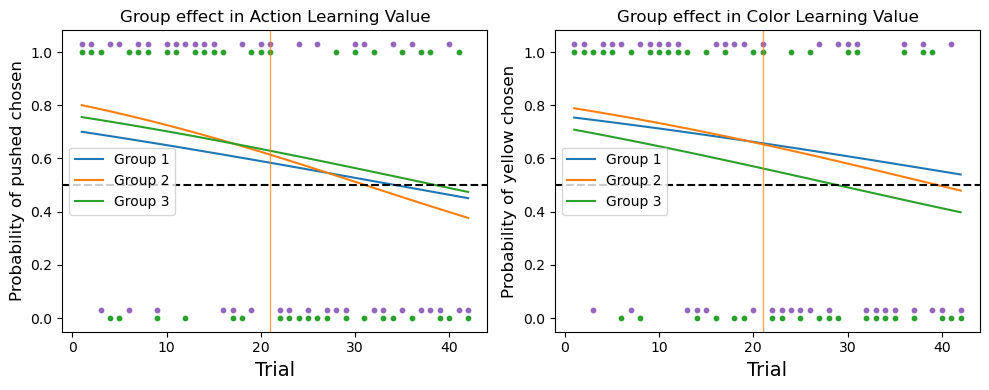

In [51]:
fig = plt.figure(figsize=(10,4), tight_layout=True)
row = 1
column = 2

fig.add_subplot(row, column, 1)
plt.plot(np.unique(x1), model1.predict_proba(np.unique(x1).reshape(-1,1))[:,1])
plt.plot(np.unique(x2), model2.predict_proba(np.unique(x2).reshape(-1,1))[:,1])
plt.plot(np.unique(x3), model3.predict_proba(np.unique(x3).reshape(-1,1))[:,1])
plt.axhline(y=.5, color='black' , linestyle='--')
plt.axvline(x = 21, color='#ff7f0e', linewidth=1, alpha=.7)
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.title('Group effect in Action Learning Value')
plt.xlabel('Trial', fontsize='14')
plt.ylabel('Probability of pushed chosen', fontsize='12')
plt.scatter(np.arange(1, 43), dataActFirst['triallist2_2'][0], s=10, c='#2ca02c', marker='o')
plt.scatter(np.arange(1, 43), -(dataClrFirst['triallist1_2'][0]-1) + .03, s=10, c='#9467bd', marker='o')


fig.add_subplot(row, column, 2)
plt.plot(np.unique(x4), model4.predict_proba(np.unique(x3).reshape(-1,1))[:,1])
plt.plot(np.unique(x5), model5.predict_proba(np.unique(x4).reshape(-1,1))[:,1])
plt.plot(np.unique(x6), model6.predict_proba(np.unique(x6).reshape(-1,1))[:,1])
plt.axhline(y=.5, color='black' , linestyle='--')
plt.axvline(x = 21, color='#ff7f0e', linewidth=1, alpha=.7)
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.title('Group effect in Color Learning Value')
plt.xlabel('Trial', fontsize='14')
plt.ylabel('Probability of yellow chosen', fontsize='12')
plt.scatter(np.arange(1, 43), dataActFirst['triallist1_2'][0], s=10, c='#2ca02c', marker='o')
plt.scatter(np.arange(1, 43), -(dataClrFirst['triallist1_1'][0]-1) + .03, s=10, c='#9467bd', marker='o')


In [115]:
model4.coef_, model6.coef_

(array([[-0.0233935]]), array([[-0.03174755]]))

In [52]:
model6.intercept_/model6.coef_

array([[-28.90212666]])

In [244]:
group13_Stim = behAll.loc[(behAll['reverse']==21)&(behAll['block']=='Stim')&(behAll['group']!=2)]
 

In [246]:
correct = np.zeros(group13_Stim.shape[0])

correct[(group13_Stim['trialNumber']>=2)&(group13_Stim['trialNumber']<=23)] = -(group13_Stim.loc[(group13_Stim['trialNumber']>=2)&(group13_Stim['trialNumber']<=23)]['yellowChosen']-1)
correct[(group13_Stim['trialNumber']>=65)&(group13_Stim['trialNumber']<=85)] = -(group13_Stim.loc[(group13_Stim['trialNumber']>=65)&(group13_Stim['trialNumber']<=85)]['yellowChosen']-1)

correct[(group13_Stim['trialNumber']>=23)&(group13_Stim['trialNumber']<=43)] = group13_Stim.loc[(group13_Stim['trialNumber']>=23)&(group13_Stim['trialNumber']<=43)]['yellowChosen']
correct[(group13_Stim['trialNumber']>=44)&(group13_Stim['trialNumber']<=65)] = group13_Stim.loc[(group13_Stim['trialNumber']>=44)&(group13_Stim['trialNumber']<=65)]['yellowChosen']


group13_Stim['correct'] = correct


/tmp/ipykernel_1549312/2065241015.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group13_Stim['correct'] = correct


In [247]:
group13_Stim.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/Test/group13_Stim.csv', index=False)

In [234]:
group13_Stim_by = group13_Stim.groupby(['group', 'sub_ID'], as_index=False)['correct'].mean()

In [235]:
group13_Stim_by[(group13_Stim_by['correct']<.40)]

,group,sub_ID,correct
8,1,sub-052,0.358974
40,3,sub-089,0.365854
42,3,sub-108,0.171429


In [236]:
group13_Stim_by = group13_Stim_by[(group13_Stim_by['sub_ID']!={'sub-108', 'sub-052', 'sub-089'})]

In [238]:
stats.ttest_rel(group13_Stim_by[group13_Stim_by['group']==1]['correct'], 
                group13_Stim_by[group13_Stim_by['group']==3]['correct'])



TtestResult(statistic=-0.10708850213528505, pvalue=0.9157352542105606, df=21)

In [239]:
group13_Stim_by['correct'].shape

(44,)

In [240]:
group13_Stim_by[group13_Stim_by['group']==1]['correct'].mean()

0.582217852510563

In [242]:
group13_Stim_by[group13_Stim_by['group']==3]['correct'].mean()

0.5851320680224285